# Preprocessing UCEC


In [2]:
from utils.Aggregation_Utils import prepare_csv
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
f = "/nodes/bevog/work4/seibel/PORPOISE/datasets_csv/tcga_ucec_all_clean.csv.zip"
df = pd.read_csv(f,compression='zip')
print(df.keys()[:20])
df.head()

Index(['case_id', 'slide_id', 'site', 'is_female', 'oncotree_code', 'age',
       'survival_months', 'censorship', 'train', 'NOTCH2_cnv', 'ACP6_cnv',
       'ANKRD20A12P_cnv', 'ANKRD34A_cnv', 'ANKRD35_cnv', 'BCL9_cnv',
       'BOLA1_cnv', 'CD160_cnv', 'CHD1L_cnv', 'FAM72B_cnv', 'FAM72C_cnv'],
      dtype='object')


,case_id,slide_id,site,is_female,oncotree_code,age,survival_months,censorship,train,NOTCH2_cnv,ACP6_cnv,ANKRD20A12P_cnv,ANKRD34A_cnv,ANKRD35_cnv,BCL9_cnv,BOLA1_cnv,CD160_cnv,CHD1L_cnv,FAM72B_cnv,FAM72C_cnv,FAM72D_cnv,FCGR1A_cnv,FCGR1B_cnv,FMO5_cnv,GJA5_cnv,GJA8_cnv,GNRHR2_cnv,GPR89A_cnv,GPR89B_cnv,HIST2H2AA3_cnv,HIST2H2AA4_cnv,HIST2H2AB_cnv,HIST2H2AC_cnv,HIST2H2BA_cnv,HIST2H2BE_cnv,HIST2H2BF_cnv,HIST2H3A_cnv,HIST2H3C_cnv,HIST2H3D_cnv,HIST2H4A_cnv,...,ZNF878,ZNF879,ZNF90,ZNF91,ZNF92,ZNF98,ZNF99,ZNFX1,ZNRD1-AS1,ZNRF1,ZNRF3,ZP1,ZP2,ZP4,ZPLD1,ZRANB1,ZRANB2,ZRANB3,ZRSR1,ZSCAN12,ZSCAN2,ZSCAN20,ZSCAN29,ZSCAN30,ZSCAN32,ZSCAN4,ZSCAN5B,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM6,ZSWIM8,ZXDA,ZXDB,ZXDC,ZYG11A,ZYX,ZZEF1,ZZZ3,snoU13
0,TCGA-2E-A9G8,TCGA-2E-A9G8-01Z-00-DX1.DCD3E31B-1774-40BA-805...,2E,1,UCEC,59.0,41.03,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TCGA-4E-A92E,TCGA-4E-A92E-01Z-00-DX1.60ED140E-11EA-49D7-ADF...,4E,1,UEC,54.0,0.43,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TCGA-4E-A92E,TCGA-4E-A92E-01Z-00-DX2.465234E4-02AC-40DF-975...,4E,1,UEC,54.0,0.43,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TCGA-4E-A92E,TCGA-4E-A92E-01Z-00-DX3.F8F74B7E-0601-4084-AE3...,4E,1,UEC,54.0,0.43,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TCGA-5B-A90C,TCGA-5B-A90C-01Z-00-DX1.3F24BFBE-425C-456A-AFF...,5B,1,UEC,69.0,39.49,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Create train test val split

In [41]:
f = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/tcga_ucec_all_clean.csv.zip"

n_bins = 4 
#df_train,df_test,df_val = prepare_csv(df_path=f,split="traintestval",n_bins=n_bins,save=True,frac_train=0.7,frac_val=0.1) !do not rerun!!!

f_train = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/tile_encoder_df/tcga_ucec__4bins_trainsplit.csv"
f_test = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/tile_encoder_df/tcga_ucec__4bins_testsplit.csv"
f_val = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/tile_encoder_df/tcga_ucec__4bins_valsplit.csv"
df_train = pd.read_csv(f_train)
df_test = pd.read_csv(f_test)
df_val = pd.read_csv(f_val)

In [42]:
ids_train = list(df_train.case_id)
ids_test = list(df_test.case_id)
ids_val = list(df_val.case_id)

for id in ids_test:
    if id in ids_val:
        print(id)

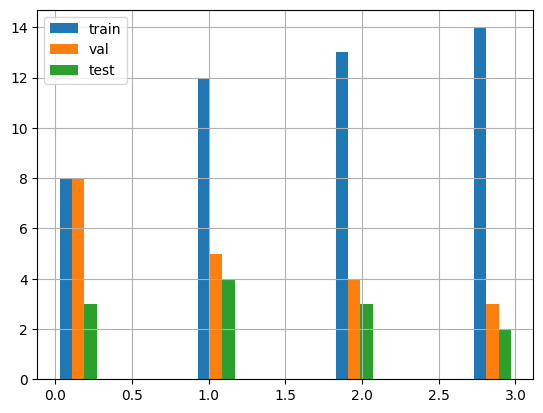

In [43]:
x = df_train[df_train["censorship"]==0].survival_months_discretized
y = df_test[df_test["censorship"]==0].survival_months_discretized
z = df_val[df_val["censorship"]==0].survival_months_discretized
data = [x,y,z]
labels = ["train","val","test"]
plt.hist(data,label=labels)
plt.legend()
plt.grid()
plt.show()

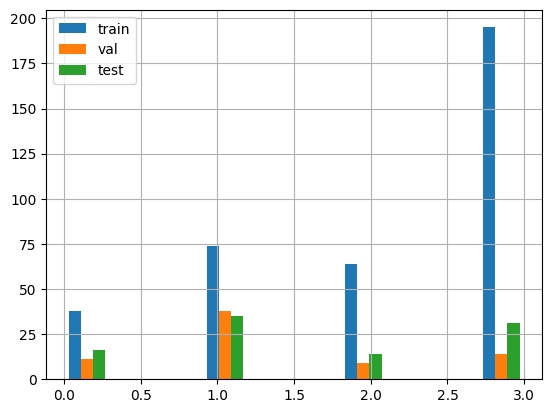

In [44]:

x = df_train.survival_months_discretized
y = df_val.survival_months_discretized
z = df_test.survival_months_discretized
data = [x,y,z]
labels = ["train","val","test"]
plt.hist(data,label=labels)
plt.legend()
plt.grid()
plt.show()

## Create 5 fold crossvalidation 

In [66]:
f = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/tcga_ucec_all_clean.csv.zip"
n_bins = 4 
#df_kfold = prepare_csv(df_path=f,save=True,split="kfold",kfolds=5) !do not rerun!!!
f_df_kfold = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/full_5foldsplit/tcga_ucec__4bins_5fold.csv" 
df_kfold = pd.read_csv(f_df_kfold)

In [48]:
lists = []
for idx in range(5):
    lists.append(list(df_kfold[df_kfold["kfold"]==idx]["case_id"]))
    
ids_test = list(df_test.case_id)
ids_val = list(df_val.case_id)

for id in lists[3]:
    if id in lists[4]:
        print(id)

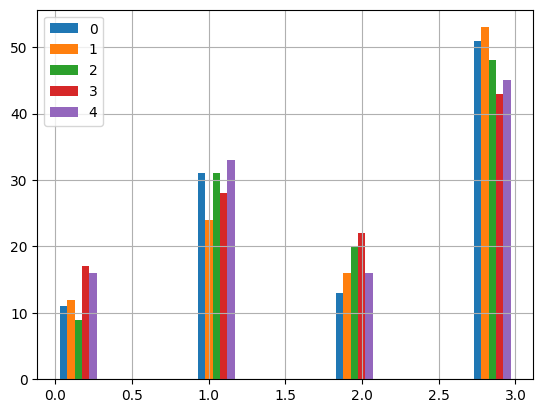

In [61]:
labels = [i for i in range(5)]
data = [list(df_kfold[df_kfold["kfold"]==idx].survival_months_discretized) for idx in labels ]
plt.hist(data,label=labels)
plt.legend()
plt.grid()
plt.show()



/tmp/ipykernel_17733/4236904741.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = [list(df_kfold[df_kfold["kfold"]==idx][df_kfold["censorship"]==0].survival_months_discretized) for idx in labels ]
/tmp/ipykernel_17733/4236904741.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = [list(df_kfold[df_kfold["kfold"]==idx][df_kfold["censorship"]==0].survival_months_discretized) for idx in labels ]
/tmp/ipykernel_17733/4236904741.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = [list(df_kfold[df_kfold["kfold"]==idx][df_kfold["censorship"]==0].survival_months_discretized) for idx in labels ]
/tmp/ipykernel_17733/4236904741.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = [list(df_kfold[df_kfold["kfold"]==idx][df_kfold["censorship"]==0].survival_months_discretized) for idx in labels ]
/tmp/ipykernel_17733/4236904741.py:5: UserWarnin

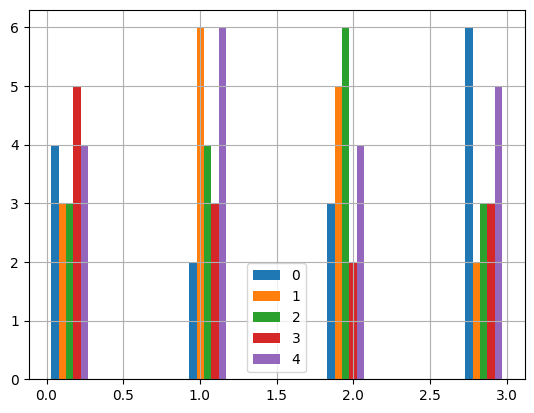

In [62]:
labels = [i for i in range(5)]
data = [list(df_kfold[df_kfold["kfold"]==idx][df_kfold["censorship"]==0].survival_months_discretized) for idx in labels ]
plt.hist(data,label=labels)
plt.legend()
plt.grid()
plt.show()


## Create 4fold on trainvaildation

In [131]:
import os 
f_train = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/tile_encoder_df/tcga_ucec__4bins_trainsplit.csv"
f_val = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/tile_encoder_df/tcga_ucec__4bins_valsplit.csv"
df_train = pd.read_csv(f_train).drop(columns=["traintest"])
df_val = pd.read_csv(f_val).drop(columns=["traintest"])
df_trainval = pd.concat([df_train,df_val]).sample(frac=1,random_state=3)

diction = dict([(name,idx) for idx,name in enumerate(df_trainval["case_id"].unique()) ])
df_trainval.insert(3,"kfold",df_trainval["case_id"].map(diction)%4) # insert kfold 

storepath = os.path.join("/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/trainval_4foldsplit/","tcga_ucec_trainable4.csv")
#df_trainval.to_csv(storepath,index=False)
#df_trainval = pd.read_csv(storepath)
df_trainval


,case_id,slide_id,site,kfold,is_female,oncotree_code,age,survival_months_discretized,survival_months,censorship,train,NOTCH2_cnv,ACP6_cnv,ANKRD20A12P_cnv,ANKRD34A_cnv,ANKRD35_cnv,BCL9_cnv,BOLA1_cnv,CD160_cnv,CHD1L_cnv,FAM72B_cnv,FAM72C_cnv,FAM72D_cnv,FCGR1A_cnv,FCGR1B_cnv,FMO5_cnv,GJA5_cnv,GJA8_cnv,GNRHR2_cnv,GPR89A_cnv,GPR89B_cnv,HIST2H2AA3_cnv,HIST2H2AA4_cnv,HIST2H2AB_cnv,HIST2H2AC_cnv,HIST2H2BA_cnv,HIST2H2BE_cnv,HIST2H2BF_cnv,HIST2H3A_cnv,HIST2H3C_cnv,...,ZNF878,ZNF879,ZNF90,ZNF91,ZNF92,ZNF98,ZNF99,ZNFX1,ZNRD1-AS1,ZNRF1,ZNRF3,ZP1,ZP2,ZP4,ZPLD1,ZRANB1,ZRANB2,ZRANB3,ZRSR1,ZSCAN12,ZSCAN2,ZSCAN20,ZSCAN29,ZSCAN30,ZSCAN32,ZSCAN4,ZSCAN5B,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM6,ZSWIM8,ZXDA,ZXDB,ZXDC,ZYG11A,ZYX,ZZEF1,ZZZ3,snoU13
229,TCGA-B5-A3FH,TCGA-B5-A3FH-01Z-00-DX1.6AFA4BA5-93E2-4E5A-9DB...,B5,0,1,UEC,74.0,2,27.63,1,0.0,0.824700,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,0.828613,...,-0.301816,-0.283126,-0.271487,-0.370312,-0.255377,-0.330232,-0.343886,-0.357233,-0.225127,-0.298142,-0.323277,-0.242774,-0.242774,-0.22964,-0.234082,-0.286931,-0.290701,-0.298142,-0.242774,-0.247030,-0.259474,-0.298142,-0.279285,-0.305461,-0.259474,-0.247030,-0.238459,-0.259474,-0.22964,-0.275406,-0.234082,-0.316228,-0.309077,-0.392652,-0.225127,-0.255377,-0.234082,-0.373544,-0.263523,-0.259474
27,TCGA-A5-A0R9,TCGA-A5-A0R9-01Z-00-DX1.743A968C-231F-41E4-ADC...,A5,1,1,UEC,51.0,2,24.61,1,1.0,-0.647198,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,...,-0.301816,-0.283126,-0.271487,-0.370312,-0.255377,-0.330232,-0.343886,-0.357233,-0.225127,-0.298142,-0.323277,-0.242774,-0.242774,-0.22964,-0.234082,-0.286931,-0.290701,-0.298142,-0.242774,-0.247030,-0.259474,-0.298142,-0.279285,-0.305461,-0.259474,-0.247030,-0.238459,-0.259474,-0.22964,-0.275406,-0.234082,-0.316228,-0.309077,-0.392652,-0.225127,-0.255377,-0.234082,-0.373544,3.794733,-0.259474
244,TCGA-BG-A0MA,TCGA-BG-A0MA-01Z-00-DX1.98944ce9-d364-4c77-8c2...,BG,2,1,UEC,60.0,0,10.71,0,1.0,-0.647198,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,...,-0.301816,-0.283126,-0.271487,-0.370312,-0.255377,-0.330232,-0.343886,-0.357233,-0.225127,-0.298142,-0.323277,-0.242774,-0.242774,-0.22964,-0.234082,-0.286931,-0.290701,-0.298142,-0.242774,-0.247030,-0.259474,-0.298142,-0.279285,-0.305461,-0.259474,-0.247030,-0.238459,-0.259474,-0.22964,-0.275406,-0.234082,-0.316228,-0.309077,-0.392652,-0.225127,-0.255377,-0.234082,-0.373544,-0.263523,-0.259474
157,TCGA-AX-A1C9,TCGA-AX-A1C9-01Z-00-DX1.0E04075D-67F1-4734-B6A...,AX,3,1,UEC,73.0,2,26.35,1,1.0,-0.647198,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,...,-0.301816,-0.283126,-0.271487,-0.370312,-0.255377,-0.330232,-0.343886,-0.357233,-0.225127,3.354102,-0.323277,-0.242774,-0.242774,-0.22964,-0.234082,-0.286931,-0.290701,3.354102,-0.242774,-0.247030,-0.259474,-0.298142,-0.279285,3.273743,-0.259474,4.048098,4.193591,-0.259474,-0.22964,-0.275406,-0.234082,-0.316228,3.235442,-0.392652,-0.225127,-0.255377,-0.234082,-0.373544,-0.263523,-0.259474
144,TCGA-AX-A06L,TCGA-AX-A06L-01Z-00-DX2.06825E45-9535-4F15-B66...,AX,0,1,UEC,63.0,3,60.61,1,1.0,-0.647198,-0.749558,-0.749558,-0.749558,-0.749558,-0.749558,-0.

In [132]:
lists = []
for idx in range(4):
    lists.append(list(df_trainval[df_trainval["kfold"]==idx]["case_id"]))
    

for id in lists[0]:
    if id in lists[1]:
        print(id)

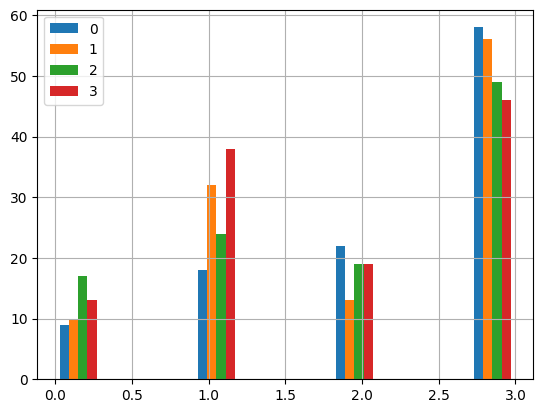

In [133]:
labels = [i for i in range(4)]
data = [list(df_trainval[df_trainval["kfold"]==idx].survival_months_discretized) for idx in labels ]
plt.hist(data,label=labels)
plt.legend()
plt.grid()
plt.show()


/tmp/ipykernel_17733/1540487346.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = [list(df_trainval[df_trainval["kfold"]==idx][df_kfold["censorship"]==0].survival_months_discretized) for idx in labels ]
/tmp/ipykernel_17733/1540487346.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = [list(df_trainval[df_trainval["kfold"]==idx][df_kfold["censorship"]==0].survival_months_discretized) for idx in labels ]
/tmp/ipykernel_17733/1540487346.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = [list(df_trainval[df_trainval["kfold"]==idx][df_kfold["censorship"]==0].survival_months_discretized) for idx in labels ]
/tmp/ipykernel_17733/1540487346.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = [list(df_trainval[df_trainval["kfold"]==idx][df_kfold["censorship"]==0].survival_months_discretized) for idx in labels ]


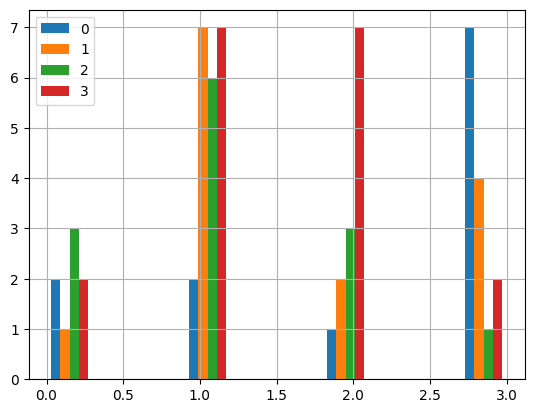

In [134]:
labels = [i for i in range(4)]
data = [list(df_trainval[df_trainval["kfold"]==idx][df_kfold["censorship"]==0].survival_months_discretized) for idx in labels ]
plt.hist(data,label=labels)
plt.legend()
plt.grid()
plt.show()


# Create Tile Dataframe 

In [3]:
import os
import pandas as pd
tile_path = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-tiles-norm/TCGA-UCEC-TILES-NORM"
ext = "jpg"
file_list = []
root_list = []
for root, dirs, files in os.walk(tile_path, topdown=False):
    for name in files:
        file_list.append(os.path.join(root, name))
        root_list.append(root.split("/")[-1]+".svs")

df_tiles = pd.DataFrame({"tilepath":file_list,"slide_id":root_list},)
df_tiles = df_tiles[df_tiles["tilepath"].str.endswith(ext)] # Avoid having other files than .<ext> files in Dataframe


print(df_tiles.tilepath.iloc[0])
print(df_tiles.slide_id.iloc[0])
storing_folderpath = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/tile_encoder_df"
title = os.path.join(storing_folderpath,"df-TCGA-UCEC-TIILES-NORM.csv")
df_tiles.to_csv(title,index=False)
df_tiles.head()

/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-tiles-norm/TCGA-UCEC-TILES-NORM/TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964C-9D57E8C38995/TCGA-B5-A5OD-01Z-00-DX1_(38526,23318).jpg
TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964C-9D57E8C38995.svs


,tilepath,slide_id
0,/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-...,TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964...
1,/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-...,TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964...
2,/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-...,TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964...
3,/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-...,TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964...
4,/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-...,TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964...


In [4]:
storing_folderpath = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-dataframes/tile_encoder_df"
title = os.path.join(storing_folderpath,"df-TCGA-UCEC-TIILES-NORM.csv")
df_tiles.to_csv(title,index=False)
df_tiles.head()

,tilepath,slide_id
0,/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-...,TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964...
1,/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-...,TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964...
2,/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-...,TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964...
3,/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-...,TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964...
4,/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-...,TCGA-B5-A5OD-01Z-00-DX1.CC68EF1E-F8FE-4482-964...


In [5]:
import os
import pandas as pd 
f_tiles = "/nodes/bevog/work3/seibel/data/TCGA-UCEC/TCGA-UCEC-tiles-norm/TCGA-UCEC-TILES-NORM"

f_csv = "/nodes/bevog/work4/seibel/PORPOISE/datasets_csv/tcga_ucec_all_clean.csv.zip"
slides = os.listdir(f_tiles)
slides = [slide+".svs" for slide in slides]
df = pd.read_csv(f_csv)

In [6]:
missing_infolds = [slide  for slide in list(df["slide_id"]) if slide not in slides]
missing_indf = [slide  for slide in slides if slide not in list(df["slide_id"])]

In [7]:
print(len(slides))
print(len(df["slide_id"]))
print(len(missing_indf))
print(len(missing_infolds))



425
539
19
133


In [8]:
missing_infolds

['TCGA-2E-A9G8-01Z-00-DX1.DCD3E31B-1774-40BA-805F-52FB9801D6C0.svs',
 'TCGA-A5-A0G1-01Z-00-DX1.4C8E9452-B448-45F6-B239-3934FD3C25C7.svs',
 'TCGA-A5-A0G2-01Z-00-DX1.B7E400A1-12DB-42D1-AF42-D46D5CF107B2.svs',
 'TCGA-A5-A0G5-01Z-00-DX1.BF825B39-7B00-45DE-9517-BE596E4ED6E5.svs',
 'TCGA-A5-A0G9-01Z-00-DX1.83B6D8A7-9FD8-4421-B71B-D8B90AA6D4F8.svs',
 'TCGA-A5-A0GA-01Z-00-DX1.D691BFC9-05DF-4815-9DCE-84B343C7015A.svs',
 'TCGA-A5-A0GB-01Z-00-DX1.5B2568B9-F9D6-41AC-A5E9-695A3E7BA751.svs',
 'TCGA-A5-A0GH-01Z-00-DX1.22005F4A-0E77-4FCB-B57A-9944866263AE.svs',
 'TCGA-A5-A0GI-01Z-00-DX1.4217BD99-8B44-4A9F-9472-23B0636FF0D2.svs',
 'TCGA-A5-A0GJ-01Z-00-DX1.B721B8FC-6F5A-421E-AB88-439506DC43FC.svs',
 'TCGA-A5-A0GV-01Z-00-DX1.7B0AFEBB-1CDE-4A01-8AE8-768D360C6ED2.svs',
 'TCGA-A5-A0GW-01Z-00-DX1.9EBB53E3-F9D5-4143-987A-332F7EECFE11.svs',
 'TCGA-A5-A0GX-01Z-00-DX1.7E713D1A-5858-4648-957D-77189E43CFAA.svs',
 'TCGA-A5-A0R6-01Z-00-DX1.4AFF4E99-BAB8-46CE-9F8B-324BAE904573.svs',
 'TCGA-A5-A0VQ-01Z-00-DX1.DE40A1AA

# Preprocessing  with ratio split


In [1]:
import pandas as pd
import numpy as np 
f = "/nodes/bevog/work4/seibel/PORPOISE/datasets_csv/tcga_brca_all_clean.csv.zip"
df = pd.read_csv(f,compression='zip')

n_bins=4
# get time bins 
df_uncensored = (df[df["censorship"]==0]).drop_duplicates(["case_id"])
_,bins = pd.qcut(df_uncensored['survival_months'],q = n_bins,retbins=True)  # distribute censored survival months into quartiles

# adapt time bins 
bins[0] = 0 
bins[-1] = np.inf
# bin name = index 
labels = [i for i in range(n_bins)]
df.insert(6,"survival_months_discretized",  pd.cut(df["survival_months"],
                                                            bins=bins, 
                                                            labels=labels)) # insert binned survival month

print(df.keys()[:20])
df.head()

Index(['case_id', 'slide_id', 'site', 'is_female', 'oncotree_code', 'age',
       'survival_months_discretized', 'survival_months', 'censorship', 'train',
       'NOTCH2_cnv', 'ACP6_cnv', 'ANKRD20A12P_cnv', 'ANKRD34A_cnv',
       'ANKRD35_cnv', 'BCL9_cnv', 'BOLA1_cnv', 'CD160_cnv', 'CHD1L_cnv',
       'FAM72B_cnv'],
      dtype='object')


,case_id,slide_id,site,is_female,oncotree_code,age,survival_months_discretized,survival_months,censorship,train,...,ZWINT_rnaseq,ZXDA_rnaseq,ZXDB_rnaseq,ZXDC_rnaseq,ZYG11A_rnaseq,ZYG11B_rnaseq,ZYX_rnaseq,ZZEF1_rnaseq,ZZZ3_rnaseq,TPTEP1_rnaseq
0,TCGA-3C-AALI,TCGA-3C-AALI-01Z-00-DX1.F6E9A5DF-D8FB-45CF-B4B...,3C,1.0,IDC,50.0,3,131.57,1.0,1.0,...,0.3196,-0.1816,-0.4114,1.0797,1.0743,-1.0477,0.9689,-0.3256,-1.1244,2.4038
1,TCGA-3C-AALI,TCGA-3C-AALI-01Z-00-DX2.CF4496E0-AB52-4F3E-BDF...,3C,1.0,IDC,50.0,3,131.57,1.0,1.0,...,0.3196,-0.1816,-0.4114,1.0797,1.0743,-1.0477,0.9689,-0.3256,-1.1244,2.4038
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01Z-00-DX1.777C0957-255A-42F0-9EE...,3C,1.0,IDC,62.0,2,48.42,1.0,1.0,...,3.2911,-1.1222,-0.1302,-1.4793,2.5267,-1.3026,0.9433,-1.1210,-0.9310,-0.6472
3,TCGA-3C-AALJ,TCGA-3C-AALJ-01Z-00-DX2.62DFE56B-B84C-40F9-962...,3C,1.0,IDC,62.0,2,48.42,1.0,1.0,...,3.2911,-1.1222,-0.1302,-1.4793,2.5267,-1.3026,0.9433,-1.1210,-0.9310,-0.6472
4,TCGA-3C-AALK,TCGA-3C-AALK-01Z-00-DX1.4E6EB156-BB19-410F-878...,3C,1.0,IDC,52.0,2,47.57,1.0,1.0,...,-0.2431,-0.3657,-0.4472,-1.0557,0.8232,-1.0342,1.0729,-1.4634,-0.5710,-0.5402


In [2]:
for i in range(4):
    print("survival bin",i)
    print("#patients",df[df['survival_months_discretized']==i].censorship.count())
    print("ratio censored",round(df[df['survival_months_discretized']==i].censorship.mean(),2))

survival bin 0
#patients 473
ratio censored 0.92
survival bin 1
#patients 232
ratio censored 0.86
survival bin 2
#patients 166
ratio censored 0.81
survival bin 3
#patients 152
ratio censored 0.78


In [3]:
kfolds = 5

dicts = []
for bin in [0,1,2,3]:
    for c in [0,1]:
        sub_df = df[(df['survival_months_discretized']==bin) & (df['censorship']==c)] 
        diction = dict([(name,idx) for idx,name in enumerate(sub_df["case_id"].unique()) ]) 
        dicts.append(diction)

full_dict = {}
for diction in dicts:
    full_dict.update(diction)
df.insert(3,"kfold",df["case_id"].map(full_dict)%kfolds)

In [4]:
for j in range(5):
    print("kfold = ",j)
    df_new = df[df["kfold"]==j]
    for i in range(4):
        censored = df_new[df_new['survival_months_discretized']==i].censorship.sum()
        uncensored = len(df_new[df_new['survival_months_discretized']==i])-censored
        print("censored",censored,"uncensored",uncensored)



kfold =  0
censored 85.0 uncensored 8.0
censored 41.0 uncensored 7.0
censored 28.0 uncensored 7.0
censored 25.0 uncensored 7.0
kfold =  1
censored 88.0 uncensored 8.0
censored 40.0 uncensored 7.0
censored 27.0 uncensored 7.0
censored 24.0 uncensored 7.0
kfold =  2
censored 87.0 uncensored 7.0
censored 40.0 uncensored 6.0
censored 26.0 uncensored 6.0
censored 24.0 uncensored 7.0
kfold =  3
censored 88.0 uncensored 6.0
censored 39.0 uncensored 6.0
censored 27.0 uncensored 6.0
censored 23.0 uncensored 6.0
kfold =  4
censored 88.0 uncensored 8.0
censored 40.0 uncensored 6.0
censored 26.0 uncensored 6.0
censored 23.0 uncensored 6.0


In [7]:
#simple loop to check if case_ids properly stratified on folds, can also be checked for slide_id instead of case_id
for i in [0,1,2,3]:
    l1 = df[df.kfold==i].case_id.unique()
    for j in [0,1,2,3]:
        if i!=j:
            l2 = df[df.kfold==j].case_id.unique()
            print(i,j)
            for id in l1:
                if id in l2:
                    print(id)
        else:
            print(i,j)
                    


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


In [ ]:
from sklearn.preprocessing import StandardScaler





In [15]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
import os 
#params
n_bins=4
storepath = "/nodes/bevog/work4/seibel/data/welldistributed5folds/"
kfolds = 5 
#read data 
f = "/nodes/bevog/work4/seibel/PORPOISE/datasets_csv/tcga_brca_all_clean.csv.zip"
df = pd.read_csv(f,compression='zip').sample(frac=1,random_state=7)



# get time bins 
df_uncensored = (df[df["censorship"]==0]).drop_duplicates(["case_id"])
_,bins = pd.qcut(df_uncensored['survival_months'],q = n_bins,retbins=True)  # distribute censored survival months into quartiles

# adapt time bins 
bins[0] = 0 
bins[-1] = np.inf
# bin name = index 
labels = [i for i in range(n_bins)]
df.insert(6,"survival_months_discretized",  pd.cut(df["survival_months"],
                                                            bins=bins, 
                                                            labels=labels)) # insert binned survival month


#create mapping that conserves ratio of censored/uncensored patients for each bin within kfolds
dicts = [] 
r_idx=0
for bin in range(n_bins):
    for c in [0,1]:
        
        sub_df = df[(df['survival_months_discretized']==bin) & (df['censorship']==c)] 
        diction = dict([(name,idx+r_idx) for idx,name in enumerate(sub_df["case_id"].unique()) ]) 
        dicts.append(diction)
        r_idx+=len(sub_df["case_id"].unique())

full_dict = {} #jon dicts to one dict
for diction in dicts:
    full_dict.update(diction)
df.insert(3,"kfold",df["case_id"].map(full_dict)%kfolds)

#normalize genomics 
genomics = df[df.keys()[11:]]
scaler = StandardScaler()
scaled_genomics = scaler.fit_transform(genomics)
df[df.keys()[11:]] = scaled_genomics

#store k different traintest splits 

assert all([f"0{i}" in os.listdir(storepath) for i in range(kfolds)]),"missing subfolders 00,01,..,0k"

for i in range(kfolds):
    df_train = df[(df["kfold"]+i)%kfolds> 0].copy().drop(columns=["kfold"])
    df_test  = df[(df["kfold"]+i)%kfolds==0].copy().drop(columns=["kfold"])
    df_train.insert(3,"traintest",0)
    df_test.insert(3,"traintest",1)
    #safedf
    f_save_train = os.path.join(storepath,f"0{i}","tcga_brca__4bins_trainsplit.csv")
    f_save_test  = os.path.join(storepath,f"0{i}","tcga_brca__4bins_testsplit.csv" )
    df_train.to_csv(f_save_train,index=False)
    df_test.to_csv(f_save_test,index=False)


In [46]:
ff = "/nodes/bevog/work4/seibel/data/welldistributed5folds/00/tcga_brca__4bins_testsplit.csv"
df_new = pd.read_csv(ff)
total = 0 
for i in range(4):
    censored = df_new[df_new['survival_months_discretized']==i].censorship.sum()
    uncensored = len(df_new[df_new['survival_months_discretized']==i])-censored
    print("censored",censored,"uncensored",uncensored)
    total += censored+ uncensored
print(total)

censored 83.0 uncensored 7.0
censored 41.0 uncensored 6.0
censored 28.0 uncensored 6.0
censored 24.0 uncensored 6.0
201.0


In [47]:
ff = "/nodes/bevog/work4/seibel/data/welldistributed5folds/01/tcga_brca__4bins_testsplit.csv"
df_new = pd.read_csv(ff)
total = 0 
for i in range(4):
    censored = df_new[df_new['survival_months_discretized']==i].censorship.sum()
    uncensored = len(df_new[df_new['survival_months_discretized']==i])-censored
    print("censored",censored,"uncensored",uncensored)
    total += censored+ uncensored
print(total)

censored 84.0 uncensored 8.0
censored 40.0 uncensored 6.0
censored 28.0 uncensored 6.0
censored 24.0 uncensored 6.0
202.0


In [48]:
ff = "/nodes/bevog/work4/seibel/data/welldistributed5folds/02/tcga_brca__4bins_testsplit.csv"
df_new = pd.read_csv(ff)
total = 0 
for i in range(4):
    censored = df_new[df_new['survival_months_discretized']==i].censorship.sum()
    uncensored = len(df_new[df_new['survival_months_discretized']==i])-censored
    print("censored",censored,"uncensored",uncensored)
    total += censored+ uncensored
print(total)

censored 89.0 uncensored 6.0
censored 39.0 uncensored 7.0
censored 26.0 uncensored 7.0
censored 23.0 uncensored 7.0
204.0


In [49]:
ff = "/nodes/bevog/work4/seibel/data/welldistributed5folds/03/tcga_brca__4bins_testsplit.csv"
df_new = pd.read_csv(ff)
total = 0 
for i in range(4):
    censored = df_new[df_new['survival_months_discretized']==i].censorship.sum()
    uncensored = len(df_new[df_new['survival_months_discretized']==i])-censored
    print("censored",censored,"uncensored",uncensored)
    total += censored+ uncensored
print(total)

censored 90.0 uncensored 8.0
censored 40.0 uncensored 7.0
censored 26.0 uncensored 7.0
censored 23.0 uncensored 7.0
208.0


In [50]:
ff = "/nodes/bevog/work4/seibel/data/welldistributed5folds/04/tcga_brca__4bins_testsplit.csv"
df_new = pd.read_csv(ff)
total = 0 
for i in range(4):
    censored = df_new[df_new['survival_months_discretized']==i].censorship.sum()
    uncensored = len(df_new[df_new['survival_months_discretized']==i])-censored
    print("censored",censored,"uncensored",uncensored)
    total += censored+ uncensored
print(total)

censored 90.0 uncensored 8.0
censored 40.0 uncensored 6.0
censored 26.0 uncensored 6.0
censored 25.0 uncensored 7.0
208.0


In [51]:
a = None
b = a is not None 

In [52]:
b

False